# Chapter 5: Equation solving

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

In [108]:
from scipy import linalg as la

In [109]:
from scipy import optimize

In [110]:
import sympy

In [111]:
sympy.init_printing()

In [112]:
import numpy as np

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl
#mpl.rcParams["font.family"] = "serif"
#mpl.rcParams["font.size"] = "12"

In [114]:
from __future__ import division

## Linear Algebra - Linear Equation Systems

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

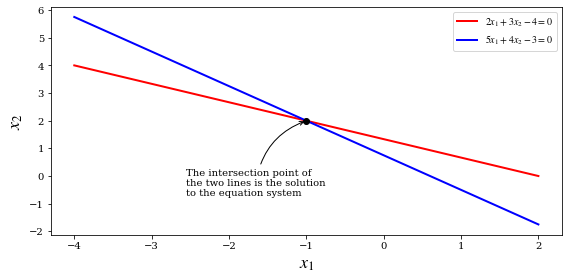

In [115]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()
fig.savefig('ch5-linear-systems-simple.pdf')

### Symbolic approach

In [116]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [117]:
A.rank()

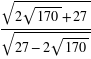

In [118]:
A.condition_number()

In [119]:
sympy.N(_)

In [120]:
A.norm()

In [121]:
L, U, P = A.LUdecomposition()

In [122]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [123]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [124]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [125]:
P

In [126]:
x = A.solve(b)

In [127]:
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

### Numerical approach

In [128]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [129]:
np.linalg.matrix_rank(A)

2

In [130]:
np.linalg.cond(A)

In [131]:
np.linalg.norm(A)

In [132]:
P, L, U = la.lu(A)

In [133]:
P

array([[0., 1.],
       [1., 0.]])

In [134]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [135]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [136]:
np.dot(L, U)

array([[5., 4.],
       [2., 3.]])

In [137]:
np.dot(P, np.dot(L, U))

array([[2., 3.],
       [5., 4.]])

In [138]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [139]:
la.solve(A, b)

array([-1.,  2.])

### Example : rank and condition numbers -> numerical errors
Part 2 starts

In [140]:
p = sympy.symbols("p", positive=True)

In [141]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [142]:
b = sympy.Matrix([1, 2])

In [143]:
sympy.simplify(A.solve(b))

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

In [144]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

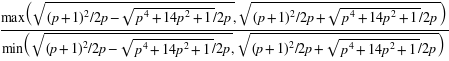

In [145]:
Acond = A.condition_number()
Acond

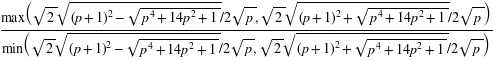

In [146]:
Acond = Acond.simplify()
Acond 

In [147]:
# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
AA(4)

array([[1. , 2. ],
       [1. , 0.5]])

In [148]:
AA(6)

array([[1.        , 2.44948974],
       [1.        , 0.40824829]])

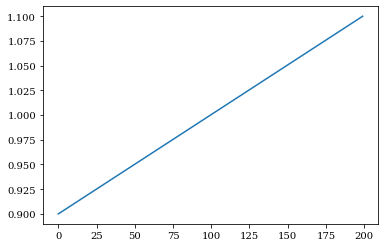

In [149]:
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)
plt.plot(p_vec)

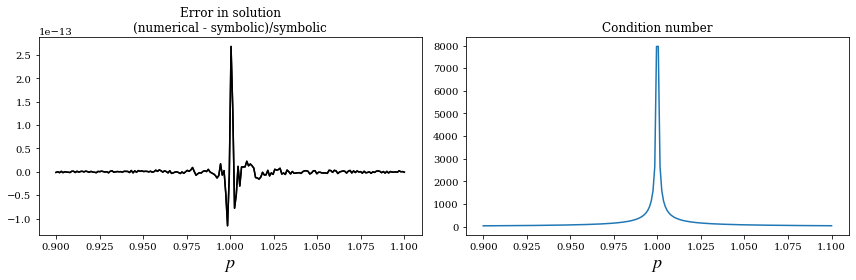

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('ch5-linear-systems-condition-number.pdf')

### Rectangular systems

### Underdetermined

In [151]:
unknown = sympy.symbols("x, y, z")

In [152]:
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])

In [153]:
x = sympy.Matrix(unknown)

In [154]:
b = sympy.Matrix([7, 8])

In [155]:
AA = A * x - b

In [156]:
sympy.solve(A*x - b, unknown)

### Overdetermined: least squares

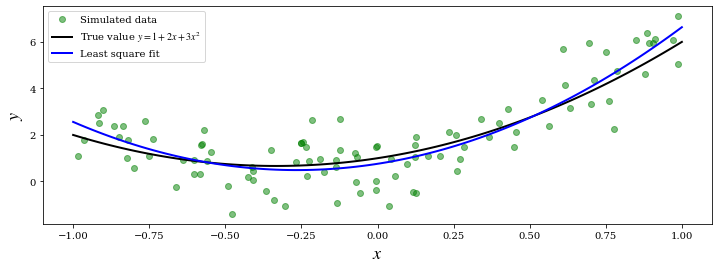

In [157]:
np.random.seed(1234)

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data points
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square.pdf')

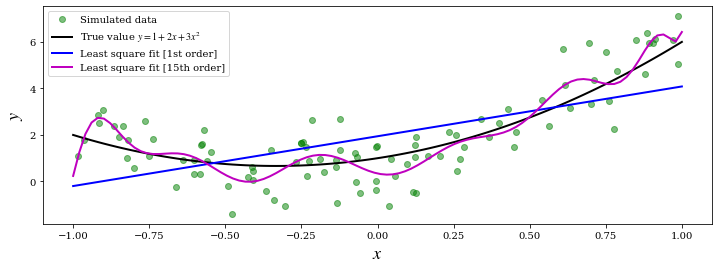

In [158]:
# fit the data to the model using linear least square: 
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square-2.pdf')